# Discworld dimensions

Let's calculate and visualize some of the aspects of the Disc.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

$3.4\times 10^{3} {\rm g/cm^3} = 3.4 \times 10^{3-3+5\times 3} {\rm kg/km^3} = 3.4 \times 10^{15} {\rm kg/km^3}$

In [86]:
radius = 150
inner_radius = radius * 25 / 200
thickness = 5
land_ratio = 0.5
area = radius ** 2 * np.pi
volume = area * thickness
density = 3.4e15
ganymed_radius = 37.675 / 2
ganymed_volume = ganymed_radius ** 3 * 4 / 3 * np.pi
earth_mass = 5.9722e24
earth_area = 510e6
land_area = area * land_ratio
population_density = 68.25
population = land_area * population_density

In [87]:
print('inner_radius: {}, inner_diameter: {}'.format(inner_radius, inner_radius * 2))
print('area: {}, land_area: {}, earth_area: {}, volume: {}'.format(area, land_area, earth_area / area / 2, volume))
print('mass: {} kg, earth_masses: {}'.format(density * volume, density * volume/ earth_mass))
print('ganymed_radius: ' + str(ganymed_radius) + ' km, ganymed_volume: {} km^3, volume_ratio: {}'.format(ganymed_volume, ganymed_volume / volume))
print('population: ' + str(population))

inner_radius: 18.75, inner_diameter: 37.5
area: 70685.83470577035, land_area: 35342.917352885175, earth_area: 3607.512043416294, volume: 353429.17352885177
mass: 1.201659189998096e+21 kg, earth_masses: 0.00020120879910218945
ganymed_radius: 18.8375 km, ganymed_volume: 28000.02410805746 km^3, volume_ratio: 0.07922386210648145
population: 2412154.1093344134


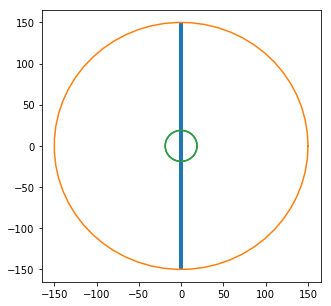

In [84]:
def ring(r):
    angles = np.linspace(0, 2 * np.pi, 60)
    plt.plot(r * np.cos(angles), r * np.sin(angles))
plt.figure(figsize=(5,5))
ring(inner_radius)
ring(radius)
ring(ganymed_radius)
plt.fill([thickness / 2, -thickness / 2, -thickness / 2, thickness / 2], [-radius, -radius, radius, radius])

(6366.197723675814, 42.44131815783876)

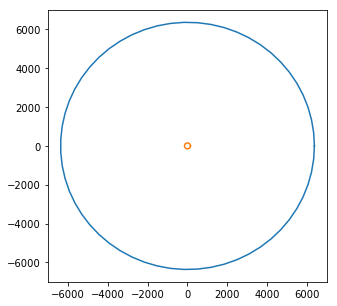

In [69]:
plt.figure(figsize=(5,5))
earth_radius = 20000 / np.pi
ring(earth_radius)
ring(radius)
earth_radius, earth_radius / radius

## Deceleration of a spacecraft from the asteroid belt to the Earth

Suppose we know the deceleration rate $a$ and top speed $v_t$.
How long would it take to stop the vehicle completely?

Let's call the answer $T$.
We know that $v_t = aT$ which means

$$T = {v_t \over a}.$$

What length would it take to stop?
We call the length $L$.
Then

$$L = \frac 12 aT^2 = \frac 12 \frac{v_t^2}{a}$$


In [64]:
decel_g = 1 # G
decel = decel_g * 9.8 # m/s^2
top_speed = 10000 # m/s
time_to_stop = top_speed / decel
length_to_stop = 1 / 2 * decel * time_to_stop ** 2
print('Time to stop:', time_to_stop, 'sec = {} minutes'.format(time_to_stop / 60), ', Length to stop:', length_to_stop, 'm')

Time to stop: 1020.408163265306 sec = 17.006802721088434 minutes , Length to stop: 5102040.81632653 m


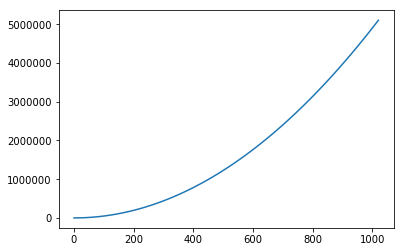

In [61]:
t = np.linspace(0,time_to_stop,100)
l = decel * t ** 2 / 2
plt.plot(t,l)

In [72]:
iss_speed_km_per_hour = 27724
iss_speed_m_per_sec = iss_speed_km_per_hour / 3600 * 1000
print(iss_speed_m_per_sec)

7701.111111111111


# Orbital elements

Let the orbital period be $T$.
We get

$$
T = 2\pi \sqrt{a^3 \over \mu}
$$
where:

 * $a$ is the length of the orbit's semi-major axis
 * $\mu = GM$ is the standard gravitational parameter of the central body
   * $G$ is the gravitational constant
   * $M$ is the mass of the more massive body.

Inversely, we get

$$
a = \sqrt[3]{GMT^2 \over 4\pi^2}.
$$


In [79]:
discworld_year = 4.5 * 365 * 24 * 3600
GMsun = 1.32712440018e20
AU = 149597870700

a = (GMsun * discworld_year ** 2 / 4 / np.pi ** 2) ** (1 / 3)
print('semimajor axis: ', a / AU)
print('solar power: ', 1 / (a / AU) ** 2)

semimajor axis:  2.7244026928898384
solar power:  0.13472785586686709
